### Pyber Ridesharing Company

#### Background 

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.


-----

#### Observable Trends

Pyber currently has a presence in urban, suburban and rural areas; however, the market share in region market is unequal.  That means that the average fare, number of rides and drivers available will vary by each developed environment. 


* There is an evident correlation between the number of rides and average fare. Urban cities have the lowest average fare with the highest number of rides. Given the data provided, the implication<sup>1</sup> is that urban drivers may have more competition and their fares are lower, rural and suburban drivers may have less competition and can charge higher fares. The bubble plot below shows that relationship as well as the allocation of drivers per city. **The insight that we can gain from this information is that there are cities with a high demand for rides but a disproportionately small number of Pyber drivers to meet demand.** It’s suggested that Pyber addresses this imbalance as the ridesharing demand is present, but Pyber’s presence in those cities is not large enough. This will result in more fares collected in revenue as riders will not need to turn to ridesharing competitors or taxi services. 


* The proposition of increasing drivers in cities with high demand to increase total profits is supported by the data in the pie chart “% of Total Fares by City Type”. While the average fare is smaller in urban cities, the quantity of rides is large enough to account for 62.7% of the total fares. 


* Additionally, we can confirm the total number of rides is proportionately related to the total fares in urban, rural or suburban cities. With that in mind, the next step is increasing Pyber’s presence in the suburban cities with high demand.  


<sup>1</sup>An alternative implication we could have deduced if distance traveled had been provided, is that urban riders travel shorter distances with more frequency and rural riders travel long distances with less frequency with the highest average fares in average.  For that information we would need the ride duration to confirm. 


-----

In [1]:
# Magic function to display the plots in line and stored in the notebook document
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

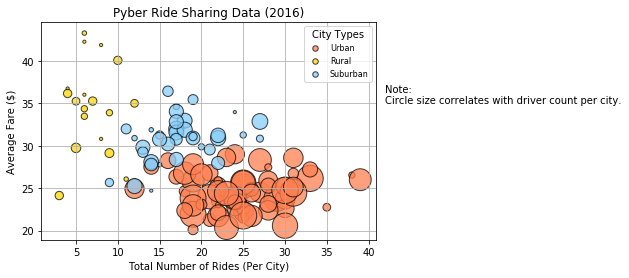

In [2]:
# Obtain the data frames for the city type(urban_rural,suburban) and then group the data frames by city
urban_city_type = pyber_df[pyber_df["type"] == "Urban"].groupby([pyber_df["city"]])
rural_city_type = pyber_df[pyber_df["type"] == "Rural"].groupby([pyber_df["city"]])
suburban_city_type = pyber_df[pyber_df["type"] == "Suburban"].groupby([pyber_df["city"]])

# Urban calculations of ride count (x), fare average(y), driver count average(s as in size)
x_urban = urban_city_type["ride_id"].count()
y_urban = urban_city_type["fare"].mean()
s_urban = urban_city_type["driver_count"].mean()

# Rural calculations of ride count (x), fare average(y), driver count average(s as in size)
x_rural = rural_city_type["ride_id"].count()
y_rural = rural_city_type["fare"].mean()
s_rural = rural_city_type["driver_count"].mean()

# Suburban calculations of ride count (x), fare average(y), driver count average(s as in size)
x_suburban = suburban_city_type["ride_id"].count()
y_suburban = suburban_city_type["fare"].mean()
s_suburban = suburban_city_type["driver_count"].mean()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=s_urban * 10, color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=s_rural * 10, color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=s_suburban  * 10, color=["lightskyblue"], edgecolor="black", alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")

# Create a legend
legend = plt.legend(fontsize = 8, title= "City Types", loc="best") 

# Adjust the legend 
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save figure with the parameter bbox_inches to fit the whole image
plt.savefig("Images/PyberRideSharingData.png", bbox_inches="tight")

# Show plot
plt.show()


## Total Fares by City Type

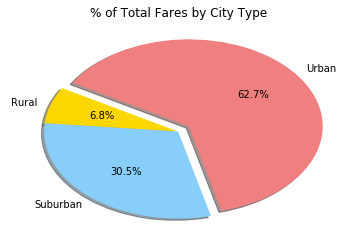

In [3]:
# Calculate Type Percents
type_groupped = pyber_df.groupby(['type'])
fare_sum = type_groupped['fare'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(fare_sum, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
plt.savefig("Images/TotalFaresbyCityType.png")

# Show Figure
plt.show()


## Total Rides by City Type

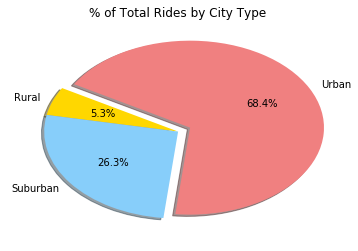

In [4]:
# Calculate Type Percents
rides_count = type_groupped['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(rides_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Images/TotalRidesbyCityType.png")

# Show Figure
plt.show()


## Total Drivers by City Type

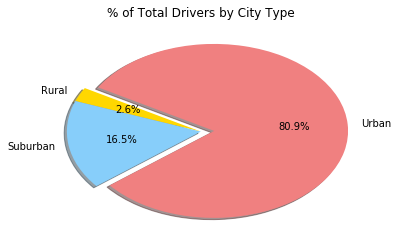

In [5]:
# Calculate Type Percents
type_groupped_drivers = city_data.groupby(['type'])
drivers_sum = type_groupped_drivers['driver_count'].sum()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Images/TotalDriversbyCityType.png")

# Show Figure
plt.show()
